In [1]:
import os
import re
import pickle

import numpy as np
from matplotlib import pyplot as plt

In [2]:
a = 'joapzfe'

In [3]:
a[:-1]

'joapzf'

# Data

In [4]:
language_labels_path = '/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/experiments/oversample/language_label/beerslaw/simplestates/ts_attention/binconcepts/2022_06_02_0/results/nonnested_cval_mltsatt_l300.pkl'
with open(language_labels_path, 'rb') as fp:
    language_labels = pickle.load(fp)

In [4]:
language_path = '/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/experiments/oversample/language/beerslaw/simplestates/ts_attention/binconcepts/2022_06_02_0/results/nonnested_cval_mltsatt_l300.pkl'
with open(language_path, 'rb') as fp:
    language_labels = pickle.load(fp)

In [51]:
years_path = '/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/experiments/oversample/years/beerslaw/simplestates/ts_attention/binconcepts/2022_06_02_0/results/nonnested_cval_mltsatt_l300.pkl'
with open(years_path, 'rb') as fp:
    years = pickle.load(fp)

In [62]:
none_path = '/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/experiments/oversample/none/beerslaw/simplestates/ts_attention/binconcepts/2022_06_02_0/results/nonnested_cval_mltsatt_l300.pkl'
with open(none_path, 'rb') as fp:
    noos = pickle.load(fp)

In [69]:
year_label_path = '/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/experiments/oversample/year_label/beerslaw/simplestates/ts_attention/binconcepts/2022_06_02_0/results/nonnested_cval_mltsatt_l300.pkl'
with open(year_label_path, 'rb') as fp:
    year_label = pickle.load(fp)

In [76]:
lang_stratlabel_path = '/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/experiments/oversample/language_stratlabel/beerslaw/simplestates/ts_attention/binconcepts/2022_06_02_0/results/nonnested_cval_mltsatt_l300.pkl'
with open(lang_stratlabel_path, 'rb') as fp:
    lang_stratlabel = pickle.load(fp)

# Definitions

In [77]:
colours = ['#241A7A', '#7A89F7', '#AFB9FA', '#EFF3F6', '#EF8C34']

In [78]:
def plot_boxplot(data, colour, position):
    box_item = plt.boxplot(data, positions=[position], patch_artist=True)
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box_item[item], color='black', linewidth=1)
    plt.setp(box_item['medians'], color='black', linewidth=1)
    plt.setp(box_item["boxes"], color=colour, edgecolor='black', linewidth=1)
    plt.setp(box_item["fliers"], markeredgecolor=colour, markersize=7)

In [79]:
def get_results(results, metric):
    r = []
    for i in range(10):
        if i in results:
            r.append(results[i][metric])
    return r

In [80]:
metrics = ['balanced_accuracy', 'roc', 'precision', 'recall']

# Plots

## ROC

In [81]:
data = [language_labels, language]
labels = ['language_label', 'language']
spacing = 1.5

language_results = get_results(language, 'roc')
language_label_results = get_results(language_labels, 'roc')
years_results = get_results(years, 'roc')
noos_results = get_results(noos, 'roc')
year_label_results = get_results(year_label, 'roc')
lang_stratlabel_results = get_results(lang_stratlabel, 'roc')

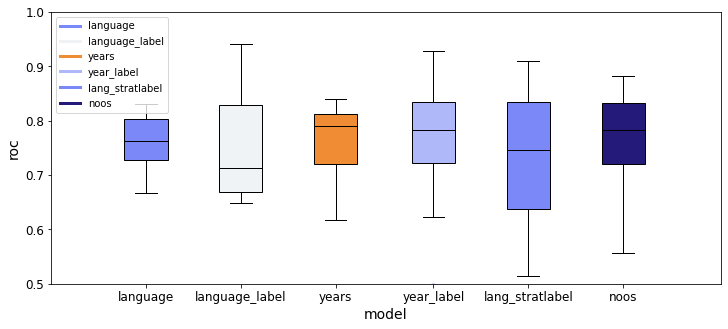

In [84]:
plt.figure(figsize=(12, 5))

plot_boxplot(language_results, colours[1], 0.33)
plot_boxplot(language_label_results, colours[3], 0.66)
plot_boxplot(years_results, colours[4], 0.99)
plot_boxplot(year_label_results, colours[2], 1.33)
plot_boxplot(lang_stratlabel_results, colours[1], 1.66)
plot_boxplot(noos_results, colours[0], 1.99)

plt.xlim([0, 2.33])
plt.ylim([0.5, 1])
plt.yticks(fontsize=12)
plt.xticks([0.33, 0.66, 0.99, 1.33, 1.66, 1.99], ['language', 'language_label', 'years', 'year_label', 'lang_stratlabel', 'noos'], fontsize=12)
plt.ylabel('roc', fontsize=14)
plt.xlabel('model', fontsize=14)

plt.plot([0, 0.66], [2, 2], label='language', color=colours[1], linewidth=3)
plt.plot([0, 0.66], [2, 2], label='language_label', color=colours[3], linewidth=3)
plt.plot([0, 0.66], [2, 2], label='years', color=colours[4], linewidth=3)
plt.plot([0, 0.66], [2, 2], label='year_label', color=colours[2], linewidth=3)
plt.plot([0, 0.66], [2, 2], label='lang_stratlabel', color=colours[1], linewidth=3)
plt.plot([0, 0.66], [2, 2], label='noos', color=colours[0], linewidth=3)

plt.legend()
# plt.savefig('full-chemlab.svg', format='svg')
plt.show()

In [5]:
language_labels['demographics'].keys()

dict_keys(['language', 'gender', 'field', 'year', 'stratifier_col', 'oversampler_col'])

In [17]:
test_path = '/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/experiments/test/small/beerslaw/simplestates/ts_attention/binconcepts/2022_06_06_6/results/nonnested_cval_mltsatt_l300.pkl'
with open(test_path, 'rb') as fp:
    test = pickle.load(fp)

In [18]:
test[0]['language']

{'tp': {'Deutsch': 0.6785714285714286, 'Français': 0.6666666666666666},
 'fp': {'Deutsch': 0.22580645161290322, 'Français': 0.4},
 'roc': {'Deutsch': 0.8052995391705069, 'Français': 0.6888888888888889},
 'recall': {'Deutsch': 0.6785714285714286, 'Français': 0.6666666666666666},
 'precision': {'Deutsch': 0.7307692307692307, 'Français': 0.5},
 'balanced_auc': {}}